# - Importation des librairies & des variables d'aides

In [1]:
# But du code : Importer les principales librairies pour réutiliser des fonctionnalités de ces librairies.
# 1-1- Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1-2- Paramétrage (optionnelle)
# warnings.simplefilter permet d'ignorer des warnings inutiles (exemple : la fonction subplots affiche un warning inutile)
import warnings
warnings.simplefilter("ignore")

# 1-3- Variables d'aides
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

# - Data Processing


# - Data loading

In [2]:
# But du code : Importer les données.

### 2.1- Importation des données
dataset = pd.read_excel(r"C:\Users\Louni\Desktop\Fourth Database Project.xlsx")

# set_index permet de dire à Python que l'identifiant de la table dataset est la colonne Loan_Id
dataset.set_index("Id", inplace=True)

dataset.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
Id,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,0.5,2.1,25.0,36,27.4,7.4,2.6,7.6,34.7,1.6,2.3,69.9,4.1,0.7,3.4,1.9,0.4,0.4,1.3,0
Andrew Harrison,0.7,2.8,23.5,35,26.9,7.2,2.0,6.7,29.6,2.6,3.4,76.5,2.4,0.5,2.0,3.7,1.1,0.5,1.6,0


# - Data splitting

3.1- Division de dataset en train (db_train) et test (db_test)

In [3]:
# But du code : Scinder la base de données en base d'apprentissage et en base de modélisation.
# Cette étape est indispensable pour construire un modèle de classification supervisé.

from sklearn.model_selection import train_test_split

db_train, db_test = train_test_split(dataset, train_size = 1072, random_state=60)

3.2- Information sur la base train et test

In [4]:
# But du code : Information sur la base de train et la base de test.

# Base train : nombre de lignes et de colonnnes
print(color.BOLD + "Base d'apprentissage" + color.END)
print(db_train.shape)

# Base test : nombre de lignes et de colonnnes
print(color.BOLD + "\nBase de test" + color.END)
print(db_test.shape)

Base d'apprentissage
(1072, 20)

Base de test
(268, 20)


Conclusion : Il y a 1072 basketteurs dans la base train qui sont décrits par 20 variables explicatives. La base test contient 268 basketteurs.

# - Analyse exploratoire des données

In [5]:
db_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
count,1072.000000,1072.000000,1063.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,0.252052,0.789272,19.676199,60.582090,17.431716,6.722201,2.602052,5.831063,44.135821,1.269496,1.783955,70.540951,2.991698,1.002052,1.990765,1.535448,0.614459,0.358116,1.186007,0.622201
std,0.386073,1.064225,15.957743,17.394064,8.181817,4.245801,1.660632,3.555303,6.174866,0.916399,1.248104,10.564298,2.048587,0.787777,1.336215,1.421114,0.404579,0.412830,0.712874,0.485063
min,0.000000,0.000000,0.000000,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.300000,0.000000,0.200000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,0.000000,0.000000,0.000000,47.000000,10.900000,3.700000,1.400000,3.300000,40.175000,0.600000,0.900000,65.000000,1.500000,0.400000,1.000000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,0.100000,0.300000,23.100000,63.000000,16.000000,5.500000,2.100000,4.800000,44.000000,1.000000,1.500000,71.500000,2.500000,0.800000,1.700000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,0.400000,1.200000,32.800000,77.000000,22.600000,8.625000,3.400000,7.500000,47.800000,1.600000,2.300000,77.800000,3.900000,1.400000,2.600000,2.000000,0.800000,0.500000,1.500000,1.000000
max,2.100000,6.500000,100.000000,82.000000,40.900000,23.700000,9.800000,19.800000,73.700000,5.700000,8.900000,100.000000,13.900000,5.300000,9.600000,9.300000,2.500000,3.500000,4.400000,1.000000


X1 : - moyenne de 0,25 3 points réalisés
X4 : - moyenne de 60 matchs joués par saison
X5 : - moyene de 17 minutes par matchs

Caclul des taux de longevité octroyés : base train et test

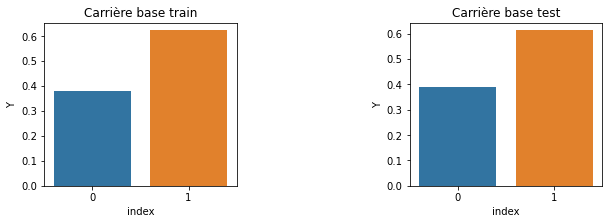

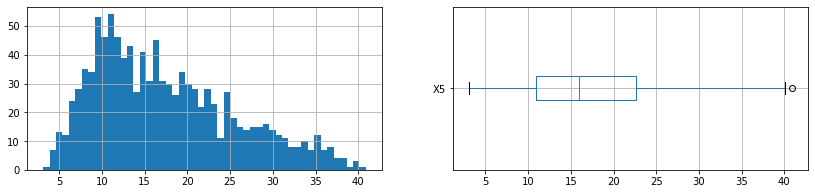

In [6]:
# But du code : Analyse descriptive de la variable Y longévité
# On observe la répartition des clients ayant obtenus une réponse positive de la banque (Loan_Status = 1) vs (Loan_Status = 0).

plt.figure(figsize=(10, 3))

#Espace d'affichage de la première courbe
plt.subplot(1,2,1)

# Taux de longévité sur la base train (apprentissage)
prop_df = (db_train['Y']
        .value_counts(normalize=True)
        .reset_index())

sns.barplot(x='index', y='Y', data=prop_df);
plt.title("Carrière base train");

#------------------------------------------------------------------

#Espace d'affichage de la seconde courbe
plt.subplot(1,2,2)

# Taux de longévité sur la base de test
prop_df = (db_test['Y']
        .value_counts(normalize=True)
        .reset_index())

sns.barplot(x='index', y='Y', data=prop_df);
plt.title("Carrière base test");

#Espace entre les deux graphiques
plt.subplots_adjust(wspace=0.9)

plt.figure(figsize=(14,3)) 
plt.subplot(1,2,1)
db_train['X5'].hist(bins=50) 
plt.subplot(1,2,2)
db_train.boxplot(column='X5', vert = False);




- 75% des basketteurs jouent 23 minutes ou moins.
- 50% jouent 15 minutes
- forte concentration entre 5 et 20 minutes


Conclusion : On remarque que seuls 38% des basketteurs ont fait moins de 5 ans de carrière. On retrouve la même proportion sur la base test. 

# Matrice de corrélation pour l'analyse des corrélations

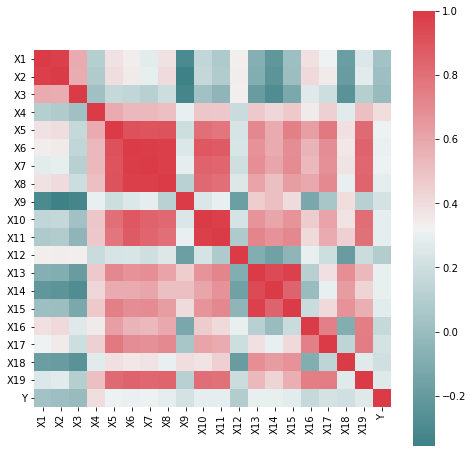

In [7]:
# But du code : Analyser la liaison entre les variables.

plt.figure(figsize=(8, 8))

corr = db_train.corr()

sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(200, 10, as_cmap=True),
            square=True);


Conclusion : les liens (corrélations) significatifs sont entre les variables :
- X19 avec X5 X6 X7 X8 X10 X11
- X10 et X11 avecX5 X6 X7 X8


# Modélisation

- Data Treatement ( Missing Values)

A - Base Train : missing values

In [8]:
# But du code : Comptabilisation des valeurs manquantes

db_train_na = db_train.isnull().sum()

print(db_train_na.sort_values(ascending=False))

del db_train_na

X3     9
Y      0
X19    0
X2     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X1     0
dtype: int64


B- Base Train : Remplissage des valeurs manquantes (missing values)

In [9]:
# But du code : Remplacer les valeurs manquantes.

# na_values contient les valeurs les plus fréquentes pour les variables qualitatives et la moyenne pour les quantatives .
na_values = {
    
'X3':db_train["X3"].mean(),

}

# Remplissage des valeurs manquantes.
db_train = db_train.fillna(value=na_values)

C- Base Test : Remplissage des valeurs manquantes (missing values)

In [10]:
# But du code : Remplir les valeurs manquantes.
db_test = db_test.fillna(value=na_values)

# Standardization directement car pas de variables quali

A- Standization de la base train directement car que des variables quanti

In [11]:
# But du code : Standardiser les données pour construire notamment les modèles de Mahine Learning.
# Pour se faire, il faut déterminer les variables qualitatives.
db_train_numericals_columns = dataset.select_dtypes('number')
numericals_features = db_train_numericals_columns.columns
del db_train_numericals_columns
numericals_features = set(numericals_features) .difference(set(['Y']))
numericals_features = list(numericals_features)
numericals_features

['X2',
 'X9',
 'X17',
 'X5',
 'X14',
 'X8',
 'X7',
 'X13',
 'X15',
 'X19',
 'X4',
 'X12',
 'X11',
 'X3',
 'X1',
 'X18',
 'X10',
 'X16',
 'X6']

In [12]:
# But du code : la méthode MinMaxScaler est une technique de standardisation de sklearn.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Standardisation de la base train
db_train[numericals_features] = scaler.fit_transform(db_train[numericals_features].to_numpy())

# Affichage des 2 premières lignes de la base train
db_train.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
Id,,,,,,,,,,,,,,,,,,,,
Solomon Jones,0.0,0.0,0.0,0.661972,0.222222,0.113043,0.084211,0.073684,0.541082,0.175439,0.146067,0.787,0.147059,0.150943,0.138298,0.021505,0.08,0.2,0.069767,1
Dwayne Schintzius,0.0,0.0,0.0,0.436620,0.169312,0.134783,0.136842,0.152632,0.402806,0.087719,0.112360,0.550,0.191176,0.132075,0.212766,0.043011,0.04,0.2,0.162791,1


B- Standization de la base test

In [13]:
#But du code : la fonction scaler.transform standardise la base test.
db_test[numericals_features] = scaler.transform(db_test[numericals_features].to_numpy())

# - Variables de modélisation

A- Identification de la variable Y et de la variable X

In [14]:
# target contient le nom de la variable Y
target = 'Y'

# features contient les noms des variables X
features = list(set(db_train.columns) - set(target.split()))
print(features)

['X2', 'X9', 'X17', 'X5', 'X14', 'X8', 'X7', 'X13', 'X15', 'X19', 'X4', 'X12', 'X11', 'X3', 'X1', 'X18', 'X10', 'X16', 'X6']


B- Base train : Détermination de la variable Y et X

In [15]:
# y_train contient les données de Y sur la base train
y_train = db_train[target]

# x_train contient les données descriptives des clients de la base train (il s'agit de la matrice X du modèle)
x_train = db_train[features]

C- Base test : Détermination de la variable Y et X

In [16]:
# y_test contient les données de Y sur la base train
y_test = db_test[target]

# x_test contient les données descriptives des clients de la base test (il s'agit de la matrice X du modèle)
x_test = db_test[features]

# Mesure de la Performance d'un Modèle

In [17]:
from sklearn import metrics

def performance_modele(modele_name, modele, dataset_name, x_dataset, y_dataset) :
    
    # MESSAGE D'AFFICHAGE
    print(color.BOLD + "\n===============================[EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]===============================")
    
    #0- PREDICTION DU MODÈLE
    y_pred = modele.predict(x_dataset)
    
    #1- MATRIC DE CONFUSION
    cm_logit = metrics.confusion_matrix(y_dataset,y_pred)
    print("1. MATRIC DE CONFUSION :" )
    print(cm_logit)
    
    #2- TAUX D'ERREUR DE CLASSEMENT
    #a- Taux de succès
    as_modele = metrics.accuracy_score(y_true = y_dataset, y_pred = y_pred)
    print("\n2-1. ACCURACY SCORE : {:.0%}".format(as_modele))
    
    #b- Taux d'erreur de classement
    err = 1.0 - as_modele
    print("\n2-2. TAUX D'ERREUR : {:.0%}".format(err))
    
    #4-AUC DU MODÈLE
    y_proba_pred = modele.predict_proba(x_dataset)[:, 1]
    
    #### B- Calcul des faux positifs et des vrais positifs
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_dataset, y_proba_pred, pos_label=1)
    
    #AUC
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    print("\n3. AUC : {:.0%}".format(roc_auc))
    
    #RESULTAT DE LA FONCTION
    print(color.BOLD + "===============================[FIN EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]==============================="+color.END)
    
    return roc_auc, fpr, tpr

# - Régression Logistique

-Formulation du modèle

In [18]:
#7.1- Formulation du modèle de régression logistique
from sklearn.linear_model import LogisticRegression

#get_reproducible_results()
logistic_modele = LogisticRegression(solver="liblinear")

#remplace les valeurs manquantes par la moyenne
x_train.fillna(x_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

x_test.fillna(x_test.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)


In [19]:
#7.2- Estimation des paramètres du modèle 
logistic_modele.fit(x_train,y_train)


LogisticRegression(solver='liblinear')

In [20]:
# Coefficiant de X0
constante_coeff = pd.DataFrame({"Feature":['constante'],"Coefficients":logistic_modele.intercept_[0]})

# Coefficiant de X
x_coeff = pd.DataFrame({"Feature":features,"Coefficients":logistic_modele.coef_[0]})

coefficient = pd.concat([constante_coeff,x_coeff])
coefficient.head(2)

,Feature,Coefficients
0,constante,-2.206649
0,X2,-0.823004


-Performance du modèle logistique sur la base train

In [21]:
roc_auc_logit_train, fpr_logit_train, tpr_logit_train = performance_modele( modele_name = "Logistique",
                                                                        modele = logistic_modele,
                                                                        dataset_name = "Train",
                                                                        x_dataset = x_train,
                                                                        y_dataset = y_train)


===============================[EVALUATION DU MODELE : Logistique SUR LE DATASET : Train]===============================
1. MATRIC DE CONFUSION :
[[202 203]
 [112 555]]

2-1. ACCURACY SCORE : 71%

2-2. TAUX D'ERREUR : 29%

3. AUC : 76%
===============================[FIN EVALUATION DU MODELE : Logistique SUR LE DATASET : Train]===============================


-Performance du modèle logistique sur la base test

In [22]:
roc_auc_logit_test, fpr_logit_test, tpr_logit_test = performance_modele(modele_name = "Logistique",
                                                                        modele = logistic_modele,
                                                                        dataset_name = "Test",
                                                                        x_dataset = x_test,
                                                                        y_dataset = y_test)


===============================[EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[ 56  48]
 [ 26 138]]

2-1. ACCURACY SCORE : 72%

2-2. TAUX D'ERREUR : 28%

3. AUC : 77%
===============================[FIN EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================


# - Gradient Boosting (Light Gradient Boosting Machine) : lgbm

Le modèle de Boosting (Light Gradient Boosting Machine) sera construit par la fonction LGBMClassifier de la librairie lightgbm.

# - Formulation du modèle lgbm

In [23]:
#Importation de la librairie lightgbm
import lightgbm as lgb

#Formulation du modele : lgbm_modele est la variable Python contenant le modèle de Boosting (Light Gradient Boosting Machine).
lgbm_modele = lgb.LGBMClassifier()

# - Affectation des paramètres du modèle lgbm

In [24]:
hyperparameter_lgbm = {
#colsample_bytree : fraction de variables x à considerer dans la construction de chaque arbre agrégé.
'colsample_bytree': 0.7928587601602566,

#learning_rate : le pas de la descente du gradient durant l'optimisation de la fonction d'erreur.
'learning_rate': 0.008335249153432506,

#max_depth : la taille ou la profondeur maximale des arbres agrégés.
'max_depth': 6,

#n_estimators : le nombnre d'arbres agrégés.
'n_estimators': 100,

#reg_alpha : Poids de regularization L1 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.
'reg_alpha': 0.9990354222430756,

#reg_lambda : Poids de regularization L2 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.
'reg_lambda': 0.718606337361164,

#subsample_for_bin : Nombres d'observations pour discrétiser les variables quantatives.
'subsample_for_bin': 200,

#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

#Pour plus de détails sur l'explication de ces paramètres, voir le lien ci-dessous.
#https://readthedocs.org/projects/lightgbm/downloads/pdf/latest/

In [25]:
# Affectation des paramètres
lgbm_modele.set_params(**hyperparameter_lgbm)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=10,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

# -Estimation du modèle lgbm

In [26]:
lgbm_modele.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=10,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

# - Performance du modèle sur la base train

In [27]:
roc_auc_lgbm_train, fpr_lgbm_train, tpr_lgbm_train = performance_modele( modele_name = "lgbm",
                                                    modele = lgbm_modele,
                                                    dataset_name = "Train",
                                                    x_dataset = x_train,
                                                    y_dataset = y_train)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================
1. MATRIC DE CONFUSION :
[[168 237]
 [ 21 646]]

2-1. ACCURACY SCORE : 76%

2-2. TAUX D'ERREUR : 24%

3. AUC : 88%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================


# - Performance du modèle sur la base test

In [28]:
roc_auc_lgbm_test, fpr_lgbm_test, tpr_lgbm_test = performance_modele( modele_name = "lgbm",
                                                                        modele = lgbm_modele,
                                                                        dataset_name = "Test",
                                                                        x_dataset = x_test,
                                                                        y_dataset = y_test)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[ 33  71]
 [ 12 152]]

2-1. ACCURACY SCORE : 69%

2-2. TAUX D'ERREUR : 31%

3. AUC : 73%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================


Conclusion : \ Le modèle de régression logistique est meilleur que le modèle de Boosting notamment sur la base de test.

# -Random Forest (RF)

-Formulation du modèle RF

Le modèle de Random Forest sera construit par la fonction RandomForestClassifier de la librairie sklearn.

In [29]:
# Importation de la librairie
from sklearn.ensemble import RandomForestClassifier

#Formulation du modèle
rf_modele = RandomForestClassifier()

-Affectation des paramètres du modèle RF

In [30]:
hyperparameter_rf = {
    
#class_weight : attribue un poids explicite à chaque valeur de la variable Y dans la construction du modèle (correction du problème de désquilibre de la base).
'class_weight': 'balanced',

#criterion : critère de performance du modèle utilisé.
'criterion': 'gini',

#max_depth : la taille ou la profondeur maximale des arbres agrégés.
'max_depth': 11,

# max_features : Nombre de variables à tirer au sort pour construire les arbres agrégés à chaque itération.
'max_features': 'sqrt',

# min_samples_leaf: Nombre minimum d'observations dans une feuille des arbres agrégés.
'min_samples_leaf': 0.08006146989323783,

# min_samples_split : Nombre minimum d'observation requis pour diviser un noeud. Il peut être exprimer en fraction du nombre total d'observations.
'min_samples_split': 0.15794570681082104,

#n_estimators : le nombnre d'arbres agrégés.
'n_estimators': 100,

#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

#Pour plus de détails sur l'explication de ces paramètres, voir le lien ci-dessous.
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [31]:
# Affectation des paramètres.
rf_modele.set_params(**hyperparameter_rf)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt',
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104, random_state=10)

-Estimation du modèle RF

In [32]:
rf_modele.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt',
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104, random_state=10)

-Performance du modèle sur la base de train

In [33]:
roc_auc_rf_train, fpr_rf_train, tpr_rf_train = performance_modele( modele_name = "rf",
                                                                        modele = rf_modele,
                                                                        dataset_name = "train",
                                                                        x_dataset = x_train,
                                                                        y_dataset = y_train)


===============================[EVALUATION DU MODELE : rf SUR LE DATASET : train]===============================
1. MATRIC DE CONFUSION :
[[301 104]
 [235 432]]

2-1. ACCURACY SCORE : 68%

2-2. TAUX D'ERREUR : 32%

3. AUC : 77%
===============================[FIN EVALUATION DU MODELE : rf SUR LE DATASET : train]===============================


-Performance du modèle sur la base de test

In [34]:
## - Performance du modèle sur la base de test
roc_auc_rf_test, fpr_rf_test, tpr_rf_test = performance_modele( modele_name = "rf",
                                                                        modele = rf_modele,
                                                                        dataset_name = "test",
                                                                        x_dataset = x_test,
                                                                        y_dataset = y_test)


===============================[EVALUATION DU MODELE : rf SUR LE DATASET : test]===============================
1. MATRIC DE CONFUSION :
[[ 74  30]
 [ 49 115]]

2-1. ACCURACY SCORE : 71%

2-2. TAUX D'ERREUR : 29%

3. AUC : 75%
===============================[FIN EVALUATION DU MODELE : rf SUR LE DATASET : test]===============================


Conclusion : \ Le modèle de régression logistique est meilleur que le modèle de RF notamment sur la base de test.

# - SVM (Support Vector Machine)

Le modèle de SVM sera construit par la fonction SVC de la librairie sklearn.

-Formulation du modèle SVM

In [35]:
# Importation de la librairie
from sklearn import svm

#get_reproducible_results()
svm_modele = svm.SVC(probability=True)

#L'option probability=True permet au modèle SVM (i.e., svm_modele) de calculer la probabilité P(Y=1)

-Affectation des paramètres du modèle SVM

In [36]:
hyperparameter_svm = {
# C : Coût d'erreur de classification ou la marge de tolérance du modèle relative aux erreurs de classification.
# Lorsque nous augmentons la valeur C, la marge diminue. Ainsi, les modèles avec des valeurs de C faibles ont tendance à être plus généralisés.
'C': 30,

    # kernel : Type de noyau utilisé. Lorsque le SVM n'est pas performant, un autre noyau pourra être utilisé pour projéter les données dans une nouvelle dimension ou nouvel espace.
'kernel': 'linear',

    # gamma : hyperparamètre utilisé avec SVM non linéaire. De faibles valeurs de gamma indiquent un grand rayon de similarité qui se traduit par le regroupement de plus de points.
# Pour des valeurs élevées de gamma, les points doivent être très proches les uns des autres afin d'être considérés dans le même groupe (ou classe).
# Par conséquent, les modèles avec des valeurs gamma très élevées ont tendance à se sur-ajuster.
'gamma' : 7,

    #random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

#Pour plus de détails sur l'explication de ces paramètres, voir le lien ci-dessous.
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [37]:
# Affectation des paramètres
svm_modele.set_params(**hyperparameter_svm)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

-Estimation du modèle SVM

In [38]:
svm_modele.fit(x_train, y_train)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

-Performance du modèle sur la base de train

In [39]:
roc_auc_svm_train, fpr_svm_train, tpr_svm_train = performance_modele( modele_name = "SVM",
                                                                        modele = svm_modele,
                                                                        dataset_name = "Train",
                                                                        x_dataset = x_train,
                                                                        y_dataset = y_train)


===============================[EVALUATION DU MODELE : SVM SUR LE DATASET : Train]===============================
1. MATRIC DE CONFUSION :
[[219 186]
 [123 544]]

2-1. ACCURACY SCORE : 71%

2-2. TAUX D'ERREUR : 29%

3. AUC : 77%
===============================[FIN EVALUATION DU MODELE : SVM SUR LE DATASET : Train]===============================


-Performance du modèle sur la base de test

In [40]:
roc_auc_svm_test, fpr_svm_test, tpr_svm_test = performance_modele( modele_name = "SVM",
                                                                        modele = svm_modele,
                                                                        dataset_name = "Test",
                                                                        x_dataset = x_test,
                                                                        y_dataset = y_test)


===============================[EVALUATION DU MODELE : SVM SUR LE DATASET : Test]===============================
1. MATRIC DE CONFUSION :
[[ 57  47]
 [ 30 134]]

2-1. ACCURACY SCORE : 71%

2-2. TAUX D'ERREUR : 29%

3. AUC : 77%
===============================[FIN EVALUATION DU MODELE : SVM SUR LE DATASET : Test]===============================


Conclusion : \ Le modèle de régression logistique est meilleur que le modèle de SVM notamment sur la base de test.

# - Comparaison de modèles

-Courbe de roc sur la base train

In [41]:
#-Rétablir les paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#Paramètre du graphique
plt.figure(figsize = (20,10))
lw = 2;

<Figure size 2000x1000 with 0 Axes>

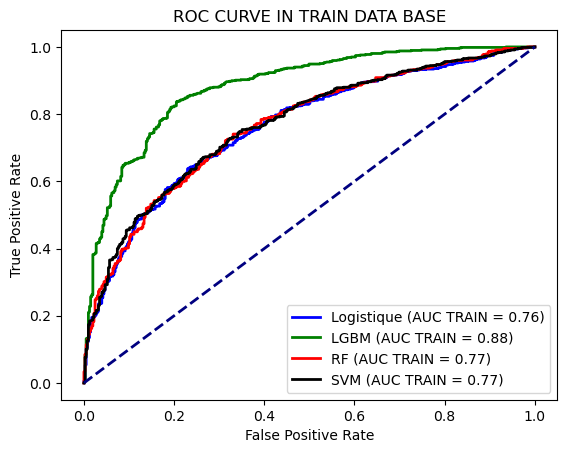

In [42]:
#LOGISTIQUE : BASE TRAIN
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_train, tpr_logit_train, color='blue', lw=lw, label='Logistique (AUC TRAIN = %0.2f)' % roc_auc_logit_train)

#LGBM : BASE TRAIN
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_train, tpr_lgbm_train, color='green', lw=lw, label='LGBM (AUC TRAIN = %0.2f)' % roc_auc_lgbm_train)

#RF : BASE TRAIN
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_train, tpr_rf_train, color='red', lw=lw, label='RF (AUC TRAIN = %0.2f)' % roc_auc_rf_train)

#SVM : BASE TRAIN
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_train, tpr_svm_train, color='black', lw=lw, label='SVM (AUC TRAIN = %0.2f)' % roc_auc_svm_train)

#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TRAIN DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

Conclusion : les meilleurs modèles sur la base train est le Boosting (LGBM).

-Courbe de roc sur la base test

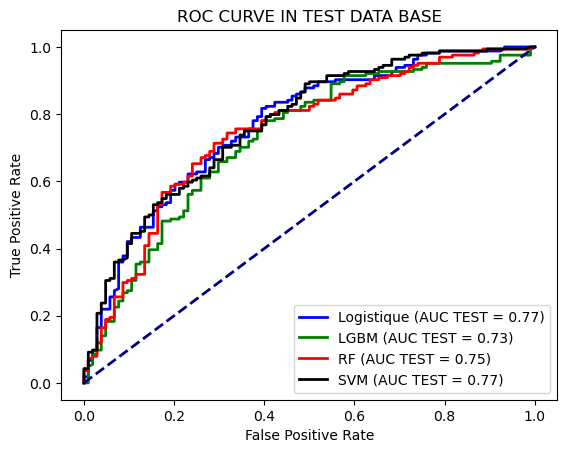

In [43]:
#LOGISTIQUE : BASE TEST
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_test, tpr_logit_test, color='blue', lw=lw, label='Logistique (AUC TEST = %0.2f)' % roc_auc_logit_test)

#LGBM : BASE TEST
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_test, tpr_lgbm_test, color='green', lw=lw, label='LGBM (AUC TEST = %0.2f)' % roc_auc_lgbm_test)

#RF : BASE TEST
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_test, tpr_rf_test, color='red', lw=lw, label='RF (AUC TEST = %0.2f)' % roc_auc_rf_test)

#SVM : BASE TEST
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_test, tpr_svm_test, color='black', lw=lw, label='SVM (AUC TEST = %0.2f)' % roc_auc_svm_test)

#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TEST DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

Conclusion : les meilleurs modèles sur la base test est la Regression Logistique.


# -Choix du meilleur modèle : REGRESSION LOG

# SCORING (avec le modèle retenu : Regression Logistique)

-Importance des variables dans le modèle

In [44]:
import numpy as np    
from sklearn.linear_model import LogisticRegression

weights = logistic_modele.coef_
abs_weights = np.abs(weights)


print(abs_weights)




[[0.82300438 0.63086719 0.21493939 0.24498527 1.58061867 0.1303959
  0.63537547 0.48595819 0.23316039 0.08449694 2.21168079 0.30681197
  0.05895904 0.16941904 0.46987598 0.79114463 0.40989063 0.72332772
  0.65665169]]


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

NameError: name 'X' is not defined

- Nous voulions remplacer "rf_modele" par "logistic_modele" afin de séléctionner la régression logistique comme notre modèle principal mais nous nous hertons à beaucoup de problèmes et d'erreurs, nous restons ainsi à rf_modele comme indiqué dans le tp.
- On peut voir que 3 composantes se dégagent pr expliquer le phénomène étudié.

In [ ]:
# But du code : l'attribut feature_importances_ du modèle de sklearn rf_modele permet de savoir l'importance des variables.
# En d'autres termes, nous pourrions connaître la contribution de chaque variable dans l'évaluation de la réponse Y (1 : longévité de plus de 5 ans vs 0 sinon).
feat_importances = pd.Series(rf_modele.feature_importances_, index = features)

# Trier l'importance par ordre décroissant.
feat_importances = feat_importances.sort_values(ascending=True)

# Afficher le graphique.
feat_importances.plot(kind='barh')

Conclusion :
Les matchs joués X4, les rebons X13, les points par matchs X6, les tirs réalisés X7 et les minutes jouées X5   sont les informations les plus pertinentes qui seront utiliséee pour étudier la
longévité de la carrière d'un basketteur professionnel. 

# - Calcul du Score

A- Reponse du modèle

In [ ]:
db_train_na = db_train.isnull().sum() 
print(db_train_na.sort_values(ascending=False))

na_values = {
'X3': db_train["X3"].mode()[0]}

db_train = db_train.fillna(value=na_values)

In [ ]:
# Generate test predictions : le modèle donnant comme réponse 1 (Y=1) pour une carrière supérieure à 5 ans, et 0 sinon (Y=0).
y_pred = rf_modele.predict(db_train[features])

#Affichage de la réponse du modèle des 5 premiers individus
y_pred[:5]

B- Score du modèle

In [ ]:
# Generate test predictions : le modèle donnant comme réponse la probabilité que Y = 1, donc, la probabilité de logévité de plus de 5 ans de carrière.
y_proba_pred = rf_modele.predict_proba(db_train[features])[:, 1]

#Affichage du score des 5 premiers individus
y_proba_pred[:5]

C- Les basketteurs de la base d'apprentissage (train)

In [ ]:
# output_train contient l'identifiant de chaque joueur de la base train. Et pour chaque joueur,
# la variable Y (Carrière), le résultat du modèle (REPONSE_RL) et le score (SCORE_RL) est renseignée.

output_train = pd.DataFrame({ 'Id': db_train.index,
                                'Y' : db_train.Y,
                                'REPONSE_RL': y_pred,
                                'SCORE_RL': y_proba_pred
                    })
# Affichage des premiers clients de
output_train.head()

# -Rating (note ou classe)

A- Creation du rating

Le rating est la note ou classe associée à chaque joueur qui mesure la probabilité qu’un joueur ne fasse pas plus de 5 ans de carrière. \ Les joueurs les plus constants, donc aptes à joueur plus longtemps, sont les joueurs ayant la note 1.\ Ensuite, nous avons les joueurs ayant la note 0 qui font moins de 5 ans de carrière. 

In [ ]:
# Le rating représenté par la variable RATING_RF est obtenu en découpant le score (SCORE_RF).
# En d’autres termes, on transforme la variable SCORE_RF en variable qualitative (groupe).
# Ainsi, les basketteurs de rating A ont 50% de chance d'avoir plus de 5 ans de carrière

output_train['RATING_RL'] = pd.cut(output_train['SCORE_RL'],
                                bins=[0, 0.5, float('Inf')],
                                labels=['B', 'A'])

# Affichage des premiers clients
output_train.head()

In [ ]:
# But du code : Analyse descriptive de la variable RATING_RL

plt.figure(figsize=(7,3))

plt.subplots_adjust(wspace = 0.8)

couleurs = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"]

plt.subplot(1,2,1)

sns.countplot(data = output_train, x = 'RATING_RL', palette = couleurs)
plt.subplot(1,2,2)
prop_df = (output_train['RATING_RL']
        .value_counts(normalize=True)
        .reset_index())

sns.barplot(x='index', y='RATING_RL', data=prop_df, palette = couleurs)

plt.show()

B- Base Train Finale

In [ ]:
# But du code : le but est d'ajouter les variables descriptives des clients de la table output_train.
# En d'autre terme, on ajoute dans la base output_train, les variables X du client.

# Pour rappel, dataset contient les données du fichier excel importé sous Python.
# L'opération merge sélectionne les variables X (contenu dans cols_to_use) de la base dataset.
# Ensuite, elle ajoute ces variables correspondantes à chaque client de la base output_train.

cols_to_use = dataset.columns.difference(output_train.columns)

output_train = output_train.merge(dataset[cols_to_use], how="inner", left_index=True, right_index=True)

output_train.head()

-Analyse du Rating

In [ ]:
pd.pivot_table(output_train[['RATING_RL','X4','X5']], index='RATING_RL', aggfunc='mean')

On constate que le rating s'améliore quand le nombre de matchs joués et le nombre de minutes jouées augmentent. 

# FEATURE ENGINEERING

In [ ]:
db_train_opt = db_train.copy() 
    
db_test_opt = db_test.copy()


In [ ]:
import numpy as np
#Calcul les points marqués
db_train_opt['POINTS MARQUES'] = db_train_opt['X1'] + db_train_opt['X10']

#Calcul les tentatives offensives en match 
db_train_opt['TENTATIVES OFFENSIVES'] = db_train_opt['X2'] + db_train_opt['X8']+ db_train_opt['X11']

#Calcul des interventions défensives en match 
db_train_opt['INTERVENTIONS DEFENSIVES'] = db_train_opt['X17'] + db_train_opt['X15']+ db_train_opt['X18']

#Calcul des Gestes offensifs en match 
db_train_opt['GESTES OFFENSIFS'] = db_train_opt['X8'] + db_train_opt['X11']+ db_train_opt['X2']+ db_train_opt['X14']+ db_train_opt['X16']


db_train_opt.head()


In [ ]:
pd.pivot_table(db_train_opt[['POINTS MARQUES','TENTATIVES OFFENSIVES', 'INTERVENTIONS DEFENSIVES','GESTES OFFENSIFS', 'Y']], index='Y', aggfunc='mean')


- On constate que les gestes offensifs sont supérieurs pr les basketteurs ayant fait plus de 5 ans de carrière 
- On constate que le nombre des tentatives offensives est supérieur chez les basketteurs ayant  fait plus de 5 ans de carrière
- On constate que les interventions défensives sont supérieurs chez les basketteurs ayant fait plus de 5 ans de carrière
